<a href="https://colab.research.google.com/github/meetgoel/ML-Projects/blob/main/data-analysis/Data_Analysis_on_Gym_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In today’s fitness-focused world, gyms are constantly looking for ways to optimize their programs and better serve their members. By analyzing data on gym members' exercise habits, health metrics, and workout preferences, we can uncover valuable insights to help gyms tailor their offerings and improve member outcomes. This analysis focuses on answering key questions, such as which workout types burn the most calories, how workout frequency relates to member experience levels, and whether there are differences in workout intensity between genders.


##Key Features:

Age: Age of the gym member.

Gender: Gender of the gym member (Male or Female).

Weight (kg): Member’s weight in kilograms.

Height (m): Member’s height in meters.

Max_BPM: Maximum heart rate (beats per minute) during workout sessions.

Avg_BPM: Average heart rate during workout sessions.

Resting_BPM: Heart rate at rest before workout.

Session_Duration (hours): Duration of each workout session in hours.

Calories_Burned: Total calories burned during each session.

Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).

Fat_Percentage: Body fat percentage of the member.

Water_Intake (liters): Daily water intake during workouts.

Workout_Frequency (days/week): Number of workout sessions per week.

Experience_Level: Level of experience, from beginner (1) to expert (3).

BMI: Body Mass Index, calculated from height and weight.

##Business Questions

1. Which workout types lead to the highest average calories burned per hour?

2. How does workout frequency relate to member progression (from beginner to expert)?

3. What is the relationship between BMI and workout type preference?

4. Are there differences in workout intensity (Max_BPM, Calories_Burned) between male and female members?

5. How does workout frequency impact fat percentage and BMI?

Dataset Link: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

##Importing the Necessary Libraries

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Reading the Dataset

In [107]:
df = pd.read_csv('/content/gym_members_exercise_tracking.csv')

##Exploratory Data Analysis

In [108]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [109]:
df.shape

(973, 15)

In [110]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [111]:
df.duplicated().value_counts()

,count
False,973


##Correlation Analysis

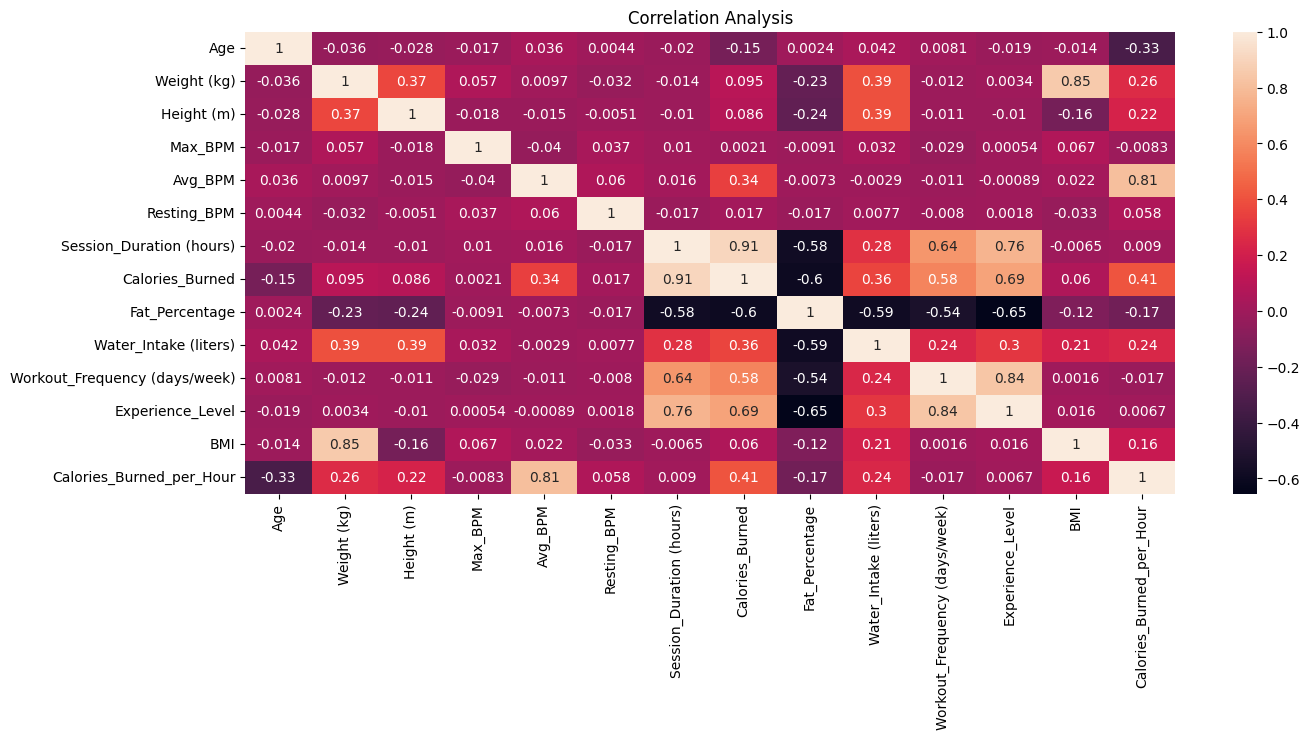

In [131]:
df2 = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(), annot=True)
plt.title('Correlation Analysis')
plt.show()

* Calories_Burned is highly correlated with:

 1. Session_Duration as it makes sense since longer sessions burn more calories.

 2. Experience_Level as more experienced users likely perform more efficient workouts.

 3. Workout_Frequency as regular training improves calorie burn.

* Fat_Percentage has a negative correlation with:
  
  1. Calories_Burned which suggests that people with higher fat percentages may burn fewer calories.

  2. Experience_Level which indicates experienced users generally have lower fat percentages.

* BMI strongly correlates with Weight as it implies BMI is largely driven by weight, which might make BMI redundant if weight is already analyzed.

* Water_Intake shows minor positive correlations with calories burned and experience level, but it’s not crucial for current business questions.

##Feature Engineering

In [113]:
# Creating a new feature - Calories_Burned_Per Hour
df['Calories_Burned_per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']

# Calculating the average calories per workout grouped by Workout_Type
avg_calories_per_workout = df.groupby('Workout_Type')['Calories_Burned_per_Hour'].mean().sort_values(ascending=False)

# Calculating the progression grouped by Workout Frequency
progression_by_frequency = df.groupby('Workout_Frequency (days/week)')['Experience_Level'].mean()

# Calculating the average BMI grouped by Workout_Type
bmi_by_workout = df.groupby('Workout_Type')['BMI'].mean().sort_values()

# Calculating the average of Max_BMI and Calories_Burned grouped by Gender
intensity_by_gender = df.groupby('Gender')[['Max_BPM', 'Calories_Burned']].mean()

# Calculating the average of Fat_Percentage and BMI grouped by Workout_Frequency
fat_bmi_by_frequency = df.groupby('Workout_Frequency (days/week)')[['Fat_Percentage', 'BMI']].mean()


##Visualizations

##Question-1: Which workout types lead to the highest average calories burned per hour?

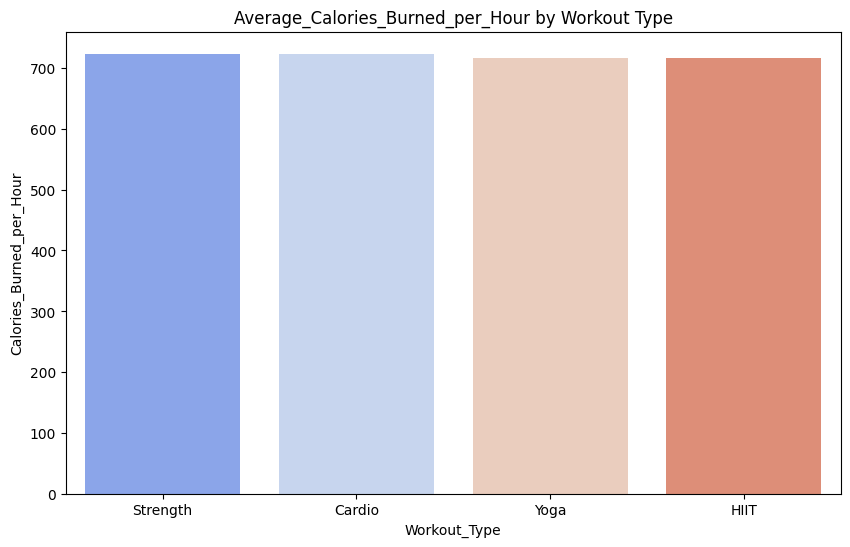

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_calories_per_workout.index, y=avg_calories_per_workout.values, palette='coolwarm')
plt.title('Average_Calories_Burned_per_Hour by Workout Type')
plt.xlabel('Workout_Type')
plt.ylabel('Calories_Burned_per_Hour')
plt.show()

In [115]:
print(avg_calories_per_workout)

Workout_Type
Strength    723.995044
Cardio      723.847992
Yoga        716.519228
HIIT        716.515099
Name: Calories_Burned_per_Hour, dtype: float64


Here strength have the highest average calories burned per hour followed by Cardio.

##Question-2: How does workout frequency relate to member progression (from beginner to expert)?

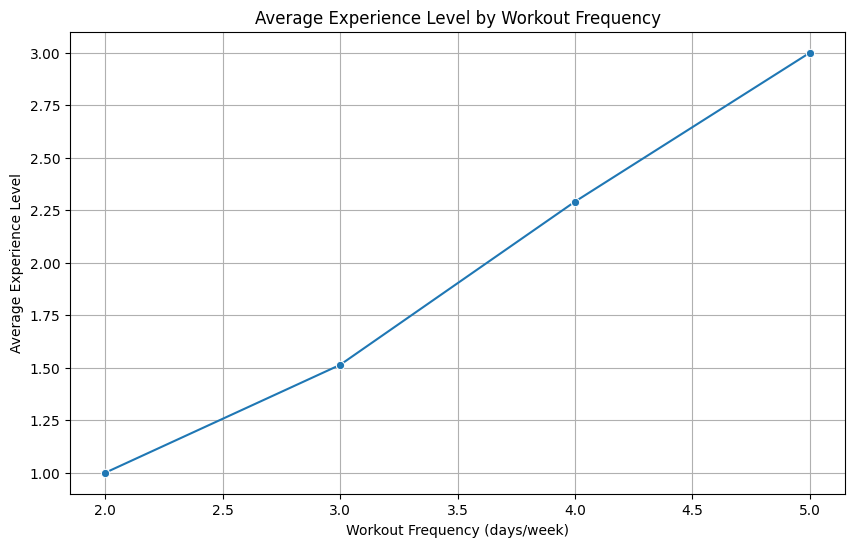

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=progression_by_frequency.index, y=progression_by_frequency.values, marker='o')
plt.title('Average Experience Level by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Average Experience Level')
plt.grid(True)
plt.show()

In [117]:
print(progression_by_frequency)

Workout_Frequency (days/week)
2    1.000000
3    1.513587
4    2.290850
5    3.000000
Name: Experience_Level, dtype: float64


Members who work out more frequently have higher experience levels.

##Question-3: What is the relationship between BMI and workout type preference?

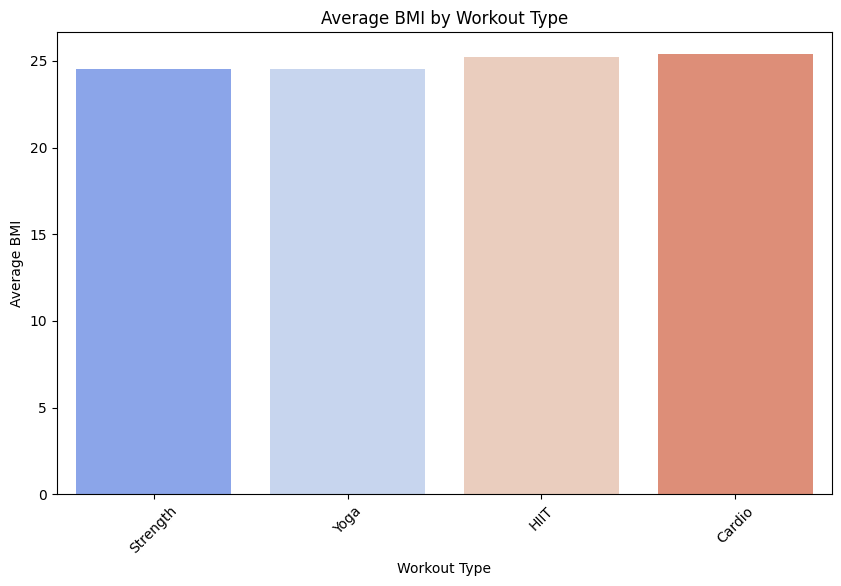

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_by_workout.index, y=bmi_by_workout.values, palette='coolwarm')
plt.title('Average BMI by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.show()

In [120]:
print(bmi_by_workout)

Workout_Type
Strength    24.543605
Yoga        24.545230
HIIT        25.201946
Cardio      25.377686
Name: BMI, dtype: float64


Strength training builds muscle, which increases weight, making a BMI in the normal range possible despite higher muscle density.

Yoga promotes a lean body composition, and the BMI indicates a balanced body with no excess fat, which is realistic.

HIIT builds both muscle and burns fat, which can lead to a BMI in the overweight range, but this doesn't necessarily indicate excess fat.

Cardio exercises help burn fat but can also build muscle, leading to a BMI above 25, especially in athletes, while still being lean.

##Question-4: Are there differences in workout intensity (Max_BPM, Calories_Burned) between male and female members?

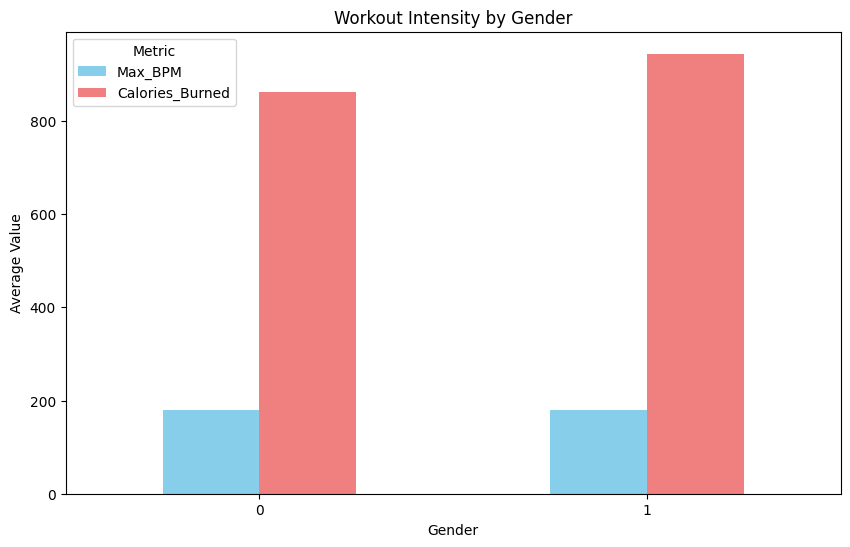

In [138]:
intensity_by_gender.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Workout Intensity by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

In [122]:
print(intensity_by_gender)

   Gender     Max_BPM  Calories_Burned
0  Female  179.759740       862.248918
1    Male  179.996086       944.455969


The Max_BPM values are almost the same, reflecting that maximum heart rate is not significantly influenced by gender.

The Calories Burned are higher in males, which aligns with biological differences in muscle mass and metabolism, as males generally have a higher caloric expenditure during physical activity.

##Question-5: How does workout frequency impact fat percentage and BMI?

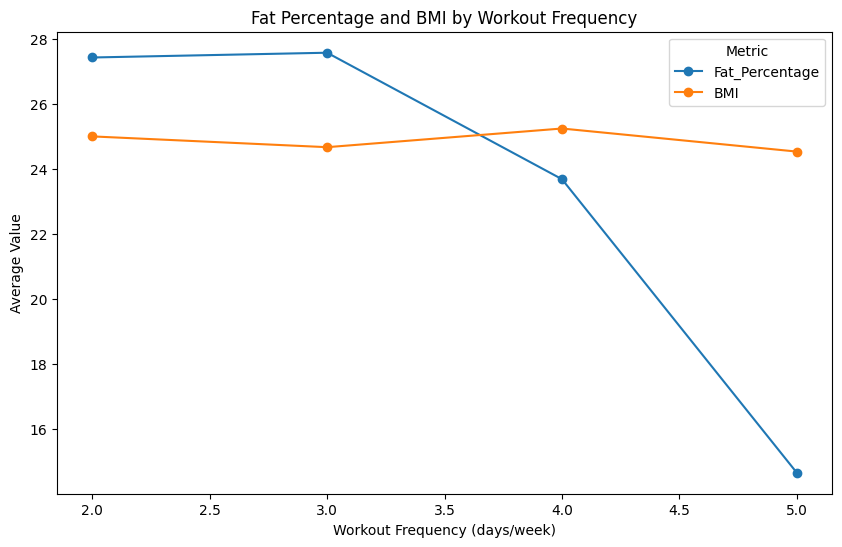

In [123]:
fat_bmi_by_frequency.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Fat Percentage and BMI by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.show()

In [124]:
print(fat_bmi_by_frequency)

                               Fat_Percentage        BMI
Workout_Frequency (days/week)                           
2                                   27.439594  25.010203
3                                   27.586413  24.678370
4                                   23.693137  25.253170
5                                   14.655882  24.542941


Increasing the workout frequency leads to a lower fat percentage, with the most significant decrease occurring at 5 days per week.

While BMI fluctuates slightly between 3 to 4 days per week, individuals who exercise 5 days per week tend to have the lowest BMI and fat percentage, indicating the effectiveness of more frequent exercise in controlling both body weight and fat.

##Conclusion:

The Dataset is cleaned and well structured and there is no need of cleaning in it. After analyzing the Business Questions on gym dataset I find that:

1.   HIIT and Cardio tend to burn the most calories per hour, while Yoga burns the least.

2.   Members who work out more frequently tend to have higher experience levels.

3. Members with lower BMI tend to prefer HIIT and Cardio, while those with higher BMI prefer Yoga and Strength training.

4. Males tend to have higher Max BPM and burn more calories than females on average.

5. Higher workout frequency is associated with lower fat percentage and BMI, indicating a positive impact on health.



In [129]:
%%shell
jupyter nbconvert --to html /content/Data_Analysis_on_Gym_Dataset.ipynb

[NbConvertApp] Converting notebook /content/Data_Analysis_on_Gym_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 429678 bytes to /content/Data_Analysis_on_Gym_Dataset.html
